In [1]:
from transformers import pipeline
import requests
import numpy as np
import os
from PIL import Image, ImageDraw

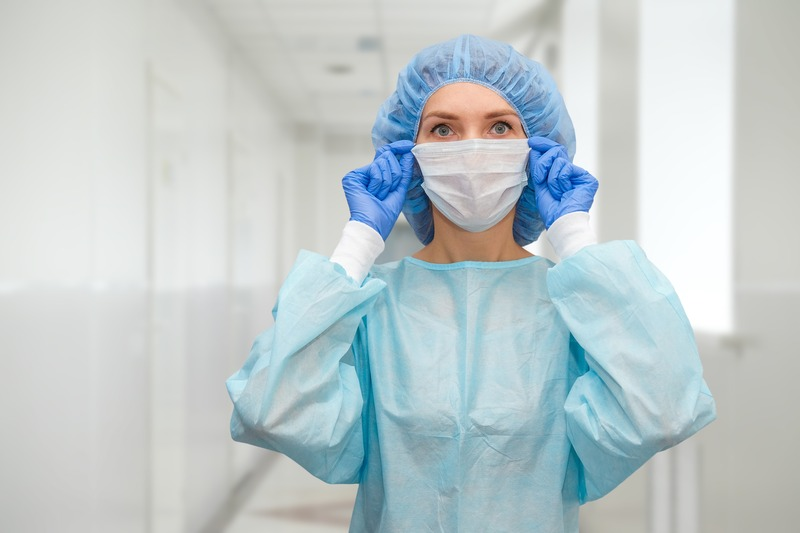

In [2]:
url = "https://i.imgur.com/2lnWoly.jpg"
#image = Image.open(requests.get(url, stream=True).raw)
image = Image.open('2lnWoly.jpeg')
image

In [3]:
#obj_detector = pipeline("object-detection", model="tosa-no-onchan/detr-resnet-50_finetuned_cppe5", device=0)
#obj_detector = pipeline("object-detection", model="devonho/detr-resnet-50_finetuned_cppe5", device=0)
obj_detector = pipeline("object-detection", model="./detr-resnet-50_finetuned_cppe5", device=0)
results = obj_detector(image)
results

[{'score': 0.5262485146522522,
  'label': 'Coverall',
  'box': {'xmin': 217, 'ymin': 29, 'xmax': 718, 'ymax': 528}}]

In [4]:
from transformers import AutoImageProcessor
from transformers import AutoModelForObjectDetection
import torch

image_processor = AutoImageProcessor.from_pretrained("tosa-no-onchan/detr-resnet-50_finetuned_cppe5")
model = AutoModelForObjectDetection.from_pretrained("tosa-no-onchan/detr-resnet-50_finetuned_cppe5")

#image_processor = AutoImageProcessor.from_pretrained("devonho/detr-resnet-50_finetuned_cppe5")
#model = AutoModelForObjectDetection.from_pretrained("devonho/detr-resnet-50_finetuned_cppe5")


with torch.no_grad():
    inputs = image_processor(images=image, return_tensors="pt")
    outputs = model(**inputs)
    target_sizes = torch.tensor([image.size[::-1]])
    results = image_processor.post_process_object_detection(outputs, threshold=0.5, target_sizes=target_sizes)[0]

for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    box = [round(i, 2) for i in box.tolist()]
    print(
        f"Detected {model.config.id2label[label.item()]} with confidence "
        f"{round(score.item(), 3)} at location {box}"
    )

#Detected Coverall with confidence 0.566 at location [1215.32, 147.38, 4401.81, 3227.08]
#Detected Mask with confidence 0.584 at location [2449.06, 823.19, 3256.43, 1413.9]

Detected Coverall with confidence 0.526 at location [217.34, 29.34, 718.87, 528.54]


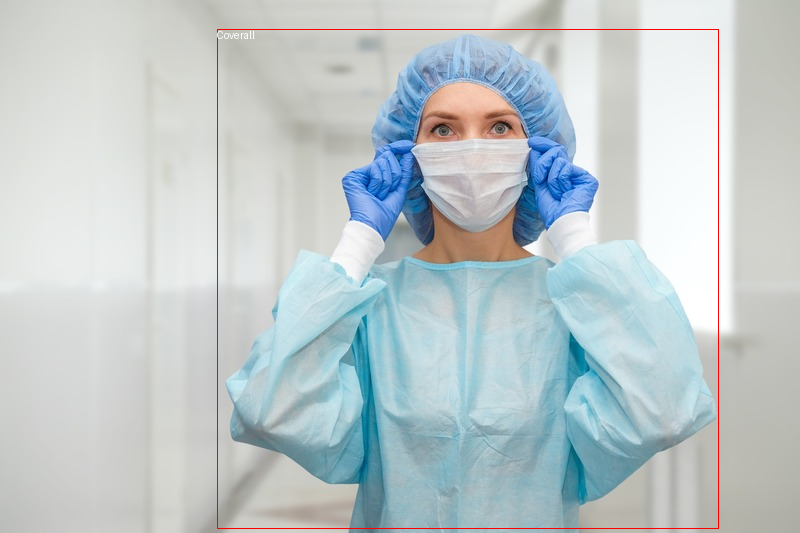

In [5]:
results
draw = ImageDraw.Draw(image)
for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    box = [round(i, 2) for i in box.tolist()]
    x, y, x2, y2 = tuple(box)
    draw.rectangle((x, y, x2, y2), outline="red", width=1)
    draw.text((x, y), model.config.id2label[label.item()], fill="white")

image